In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.insert(0, '../geoplot/')
from geoplot import utils
import geoplot as gplt
from geoplot import crs as gcrs
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# savefig_kwargs = {'bbox_inches': 'tight', 'pad_inches': 0.25}

# Pointplot

In [4]:
# points = utils.gaussian_points()
# gplt.pointplot(points, projection=gcrs.PlateCarree())
# plt.savefig('../figures/pointplot/pointplot-initial.png', **savefig_kwargs)

In [6]:
cities = gpd.read_file("../geoplot/data/cities/citiesx010g.shp")
cities = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

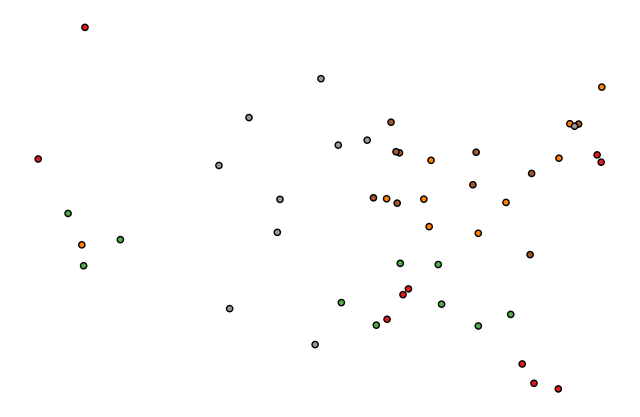

In [8]:
gplt.pointplot(cities.sample(50), projection=gcrs.AlbersEqualArea(), hue='ELEV_IN_FT')
# plt.savefig('../figures/pointplot/pointplot-hue.png', **savefig_kwargs)

In [ ]:
# gplt.pointplot(cities, projection=gcrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True)
# plt.savefig('../figures/pointplot/pointplot-legend.png', **savefig_kwargs)

In [ ]:
# gplt.pointplot(cities, projection=gcrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True, legend_labels=list('ABCDE'))
# plt.savefig('../figures/pointplot/pointplot-legend-labels.png', **savefig_kwargs)

In [ ]:
# gplt.pointplot(cities, projection=gcrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True, scheme='equal_interval')
# plt.savefig('../figures/pointplot/pointplot-scheme.png', **savefig_kwargs)

In [9]:
collisions = pd.read_csv("../geoplot/data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return shapely.geometry.Point(0, 0)
    else:
        return shapely.geometry.Point(long, lat)

collisions = gpd.GeoDataFrame(collisions.head(500), geometry=collisions.head(500).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

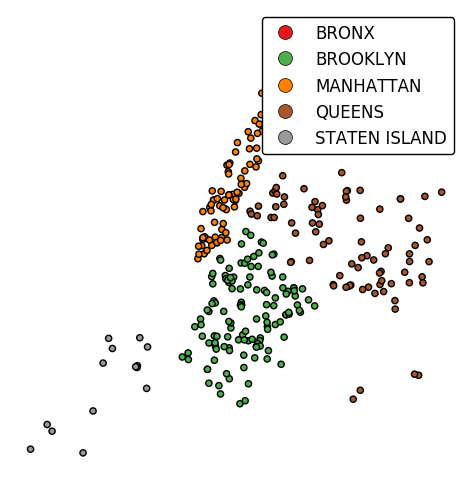

In [10]:
gplt.pointplot(collisions[collisions['BOROUGH'].notnull()], projection=gcrs.AlbersEqualArea(), hue='BOROUGH',
               legend=True, categorical=True)
# plt.savefig('../figures/pointplot/pointplot-categorical.png', **savefig_kwargs)

In [ ]:
# gplt.pointplot(collisions[collisions['BOROUGH'].notnull()], projection=gcrs.AlbersEqualArea(), 
#                hue='BOROUGH', categorical=True,
#                legend=True, legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/pointplot/pointplot-legend-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.pointplot(collisions[collisions['BOROUGH'].notnull()], projection=gcrs.AlbersEqualArea(), 
#                hue='BOROUGH', categorical=True, 
#                legend=True, legend_kwargs={'loc': 'upper left'},
#                edgecolor='white', linewidth=0.5)
# plt.savefig('../figures/pointplot/pointplot-kwargs.png', **savefig_kwargs)

In [11]:
more_points = utils.gaussian_points(n=3000)
data = gpd.GeoDataFrame(data={'classification': utils.classify_clusters(more_points, n=6)}, geometry=more_points)
data = data.assign(var=data['classification'] * 0.5 + pd.Series([p.x + p.y for p in data['geometry']]) + 50 + np.random.normal(size=3000) * 8)

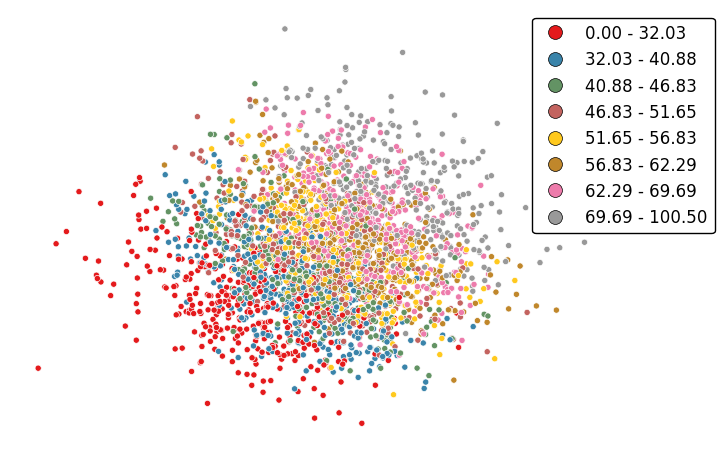

In [12]:
gplt.pointplot(data, projection=gcrs.AlbersEqualArea(),
               hue='var', k=8,
               edgecolor='white', linewidth=0.5,
               legend=True, legend_kwargs={'bbox_to_anchor': (1.15, 1.0)})
# plt.savefig('../figures/pointplot/pointplot-k.png', **savefig_kwargs)

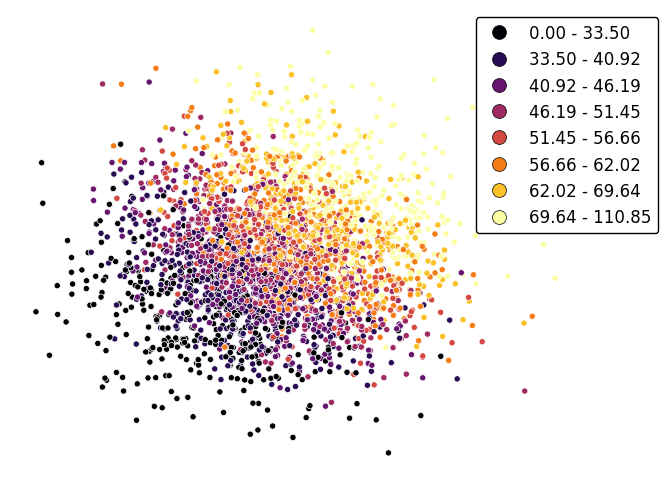

In [13]:
more_points = utils.gaussian_points(n=3000)
data = gpd.GeoDataFrame(data={'classification': utils.classify_clusters(more_points, n=6)}, geometry=more_points)
data = data.assign(var=data['classification'] * 0.5 + pd.Series([p.x + p.y for p in data['geometry']]) + 50 + np.random.normal(size=3000) * 8)
gplt.pointplot(data, projection=gcrs.AlbersEqualArea(),
               hue='var', cmap='inferno', k=8,
               edgecolor='white', linewidth=0.5,
               legend=True, legend_kwargs={'bbox_to_anchor': (1.15, 1.0)})
# plt.savefig('../figures/pointplot/pointplot-cmap.png', **savefig_kwargs)

In [ ]:
# more_points = utils.gaussian_points(n=3000)
# data = gpd.GeoDataFrame(data={'classification': utils.classify_clusters(more_points, n=6)}, geometry=more_points)
# data = data.assign(var=data['classification'] * 0.5 + pd.Series([p.x + p.y for p in data['geometry']]) + 50 + np.random.normal(size=3000) * 8)
# gplt.pointplot(data, projection=gcrs.AlbersEqualArea(),
#                hue='var', cmap='inferno', k=None,
#                edgecolor='white', linewidth=0.5,
#                legend=True)
# plt.savefig('../figures/pointplot/pointplot-k-none.png', **savefig_kwargs)

In [ ]:
# gplt.pointplot(collisions, projection=gcrs.AlbersEqualArea(), 
#                scale='NUMBER OF PERSONS INJURED',
#                legend=True, legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/pointplot/pointplot-scale.png', **savefig_kwargs)

In [ ]:
# gplt.pointplot(collisions, projection=gcrs.AlbersEqualArea(), 
#                scale='NUMBER OF PERSONS INJURED', limits=(0, 10),
#                legend=True, legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/pointplot/pointplot-limits.png', **savefig_kwargs)

In [ ]:
# def trivial_scale(minval, maxval):
#     def scalar(val):
#         return 2
#     return scalar

# gplt.pointplot(collisions, projection=gcrs.AlbersEqualArea(), 
#                scale='NUMBER OF PERSONS INJURED', scale_func=trivial_scale,
#                legend=True, legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/pointplot/pointplot-scale-func.png', **savefig_kwargs)

In [ ]:
# gplt.pointplot(collisions[collisions['BOROUGH'].notnull()],
#                projection=gcrs.AlbersEqualArea(),
#                hue='BOROUGH', categorical=True,
#                scale='NUMBER OF PERSONS INJURED', limits=(0, 10),
#                legend=True, legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/pointplot/pointplot-hue-scale.png', **savefig_kwargs)

In [ ]:
# gplt.pointplot(collisions[collisions['BOROUGH'].notnull()],
#                projection=gcrs.AlbersEqualArea(),
#                hue='BOROUGH', categorical=True,
#                scale='NUMBER OF PERSONS INJURED', limits=(0, 10),
#                legend=True, legend_kwargs={'loc': 'upper left'},
#                legend_var='scale')
# plt.savefig('../figures/pointplot/pointplot-legend-var.png', **savefig_kwargs)

# Choropleth

In [15]:
boroughs = gpd.read_file("../geoplot/data/nyc_boroughs/boroughs.geojson", driver='GeoJSON')

In [16]:
from random import randint
polygons = utils.gaussian_polygons(n=20, points=utils.gaussian_points(n=3000))
polydata = gpd.GeoDataFrame(data={'classification': [randint(1, 20) for _ in range(len(polygons))]}, geometry=polygons)

In [17]:
polydata['latdep'] = polydata['classification'] + np.random.normal() * 5 + 5 + polydata.geometry.envelope.exterior.map(lambda ext: ext.coords[0][1] + ext.coords[0][0])

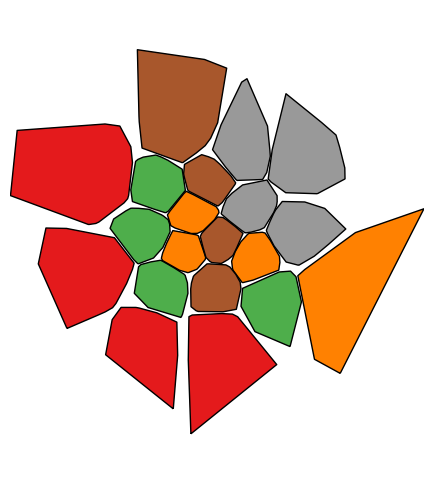

In [18]:
gplt.choropleth(polydata, hue='latdep', projection=gcrs.PlateCarree())
# plt.savefig('../figures/choropleth/choropleth-initial.png', **savefig_kwargs)

In [ ]:
# gplt.choropleth(polydata, hue='latdep', projection=gcrs.PlateCarree(), cmap='Blues')
# plt.savefig('../figures/choropleth/choropleth-cmap.png', **savefig_kwargs)

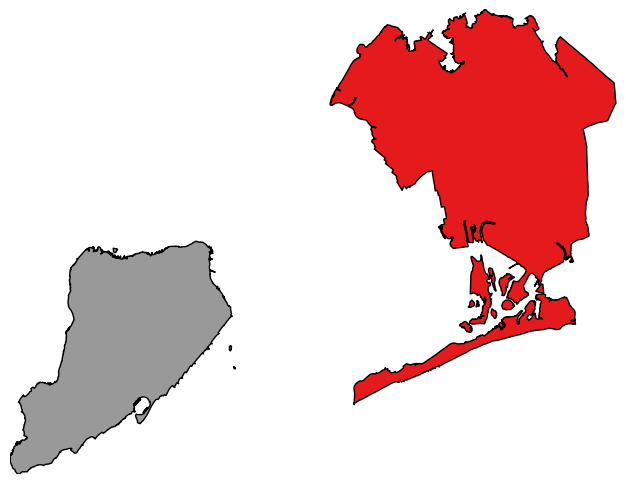

In [20]:
gplt.choropleth(boroughs.head(2), projection=gcrs.AlbersEqualArea(), hue='BoroName', categorical=True)
# plt.savefig('../figures/choropleth/choropleth-categorical.png', **savefig_kwargs)

In [ ]:
# gplt.choropleth(boroughs, projection=gcrs.AlbersEqualArea(), hue='BoroName', categorical=True,
#                 legend=True)
# plt.savefig('../figures/choropleth/choropleth-legend.png', **savefig_kwargs)

In [ ]:
# gplt.choropleth(boroughs, projection=gcrs.AlbersEqualArea(), hue='BoroName', categorical=True,
#                 legend=True, legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/choropleth/choropleth-legend-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.choropleth(boroughs, projection=gcrs.AlbersEqualArea(), hue='BoroName', categorical=True,
#                 linewidth=0)
# plt.savefig('../figures/choropleth/choropleth-kwargs.png', **savefig_kwargs)

In [ ]:
from random import randint
census_tracts = gpd.read_file("../data/nyc_census_tracts/census_tracts_2010.geojson", driver='GeoJSON')
census_tracts['mock_data'] = [randint(10, 1000) for _ in range(len(census_tracts))]
census_tracts['mock_category'] = [randint(1, 5) for _ in range(len(census_tracts))]

In [ ]:
# gplt.choropleth(census_tracts, hue='mock_data', projection=gcrs.AlbersEqualArea(),
#                 legend=True, edgecolor='white', linewidth=0.5, legend_kwargs={'loc': 'upper left'},
#                 k=2)
# plt.savefig('../figures/choropleth/choropleth-k.png', **savefig_kwargs)

In [ ]:
# gplt.choropleth(census_tracts, hue='mock_data', projection=gcrs.AlbersEqualArea(),
#                 legend=True, edgecolor='white', linewidth=0.5, cmap='viridis',
#                 k=None)
# plt.savefig('../figures/choropleth/choropleth-k-none.png', **savefig_kwargs)

In [ ]:
# gplt.choropleth(census_tracts, hue='mock_data', projection=gcrs.AlbersEqualArea(),
#                 edgecolor='white', linewidth=0.5,
#                 legend=True, legend_kwargs={'loc': 'upper left'},
#                 legend_labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
# plt.savefig('../figures/choropleth/choropleth-legend-labels.png', **savefig_kwargs)

In [ ]:
# gplt.choropleth(census_tracts, hue='mock_data', projection=gcrs.AlbersEqualArea(),
#                 legend=True, edgecolor='white', linewidth=0.5, legend_kwargs={'loc': 'upper left'},
#                 scheme='equal_interval')
# plt.savefig('../figures/choropleth/choropleth-scheme.png', **savefig_kwargs)

# Polyplot

In [ ]:
# gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
# plt.savefig('../figures/polyplot/polyplot-initial.png', **savefig_kwargs)

In [ ]:
# gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), 
#               linewidth=0, facecolor='lightgray')
# plt.savefig('../figures/polyplot/polyplot-kwargs.png', **savefig_kwargs)

In [ ]:
ax = gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
gplt.pointplot(collisions[collisions['BOROUGH'].notnull()], projection=gcrs.AlbersEqualArea(), 
               hue='BOROUGH', categorical=True, 
               legend=True, edgecolor='white', linewidth=0.5, legend_kwargs={'loc': 'upper left'},
               ax=ax)
# plt.savefig('../figures/polyplot/polyplot-stacked.png', **savefig_kwargs)

# Aggplot

In [ ]:
from shapely.geometry import Point

cdata = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(long, lat)

collisions = gpd.GeoDataFrame(cdata.head(10000), geometry=cdata.head(10000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

latmax, latmin, longmax, longmin = collisions['LATITUDE'].max(), collisions['LATITUDE'].min(),\
                                   collisions['LONGITUDE'].max(), collisions['LONGITUDE'].min()
    
def genpattern(srs):
    return (srs['LATITUDE'] - latmin) / (latmax - latmin)

collisions['LATDEP'] = collisions.apply(genpattern, axis='columns')

del cdata

In [ ]:
# gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='LATDEP')
# plt.savefig('../figures/aggplot/aggplot-initial.png', **savefig_kwargs)

In [ ]:
gplt.aggplot(collisions, nmin=20, nmax=500, nsig=5, projection=gcrs.PlateCarree(), hue='LATDEP', cmap='Blues')
plt.savefig('../figures/aggplot/aggplot-quadtree-tuned.png', **savefig_kwargs)

In [ ]:
# gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
#              by='BOROUGH')
# plt.savefig('../figures/aggplot/aggplot-hulls.png', **savefig_kwargs)

In [ ]:
# boroughs_2 = boroughs.set_index('BoroName')
# boroughs_2.index = [b.upper() for b in boroughs_2.index]
# gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
#              geometry=boroughs_2, by='BOROUGH')
# plt.savefig('../figures/aggplot/aggplot-by.png', **savefig_kwargs)

In [ ]:
# boroughs_2 = boroughs.set_index('BoroName')
# boroughs_2.index = [b.upper() for b in boroughs_2.index]
# gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
#              geometry=boroughs_2, by='BOROUGH', agg=len)
# plt.savefig('../figures/aggplot/aggplot-agg.png', **savefig_kwargs)

In [ ]:
# gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
#              geometry=boroughs_2, by='BOROUGH', agg=len, legend=False)
# plt.savefig('../figures/aggplot/aggplot-legend.png', **savefig_kwargs)

In [ ]:
# gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
#              geometry=boroughs_2, by='BOROUGH', agg=len, linewidth=0)
# plt.savefig('../figures/aggplot/aggplot-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.aggplot(collisions, projection=gcrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
#              geometry=boroughs_2, by='BOROUGH', agg=len, linewidth=0, 
#              legend_kwargs={'orientation': 'horizontal'})
# plt.savefig('../figures/aggplot/aggplot-legend-kwargs.png', **savefig_kwargs)

# Cartogram

In [ ]:
boroughs = gpd.read_file("../data/nyc_boroughs/boroughs.geojson", driver='GeoJSON')
boroughs['Population'] = [378, 1951, 2300, 1487, 1203]
boroughs['Population Density'] = boroughs['Population'] / boroughs['Shape_Area']

In [ ]:
gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea())
# plt.savefig('../figures/cartogram/cartogram-initial.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                trace=False, legend=True)
# plt.savefig('../figures/cartogram/cartogram-trace-legend.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                trace=False, legend=True, legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/cartogram/cartogram-legend-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(), legend=True,
#                legend_values=[2.32779655e-07, 6.39683197e-07, 1.01364661e-06, 1.17380941e-06, 2.33642596e-06][::-1],
#                legend_labels=['Manhattan', 'Brooklyn', 'Queens', 'The Bronx', 'Staten Island'],
#                legend_kwargs={'loc': 'upper left'})
# plt.savefig('../figures/cartogram/cartogram-legend-labels.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                edgecolor='darkgreen')
# plt.savefig('../figures/cartogram/cartogram-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                trace_kwargs={'edgecolor': 'lightgreen'})
# plt.savefig('../figures/cartogram/cartogram-trace-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                limits=(0.5, 1))
# plt.savefig('../figures/cartogram/cartogram-limits.png', **savefig_kwargs)

In [ ]:
# def trivial_scale(minval, maxval):
#     def scalar(val):
#         return 0.5
#     return scalar

# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                limits=(0.5, 1), scale_func=trivial_scale)
# plt.savefig('../figures/cartogram/cartogram-scale-func.png', **savefig_kwargs)

In [ ]:
# gplt.cartogram(boroughs, scale='Population Density', projection=gcrs.AlbersEqualArea(),
#                hue='Population Density', k=None, cmap='Blues')
# plt.savefig('../figures/cartogram/cartogram-hue.png', **savefig_kwargs)

## KDEPlot

In [ ]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea())
# plt.savefig('../figures/kdeplot/kdeplot-initial.png', **savefig_kwargs)

In [ ]:
# ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea())
# gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
# plt.savefig('../figures/kdeplot/kdeplot-overlay.png', **savefig_kwargs)

In [ ]:
# ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(), shade=True)
# gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
# plt.savefig('../figures/kdeplot/kdeplot-shade.png', **savefig_kwargs)

In [ ]:
# ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(), n_levels=30)
# gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
# plt.savefig('../figures/kdeplot/kdeplot-n-levels.png', **savefig_kwargs)

In [ ]:
# ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(), cmap='Purples')
# gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
# plt.savefig('../figures/kdeplot/kdeplot-cmap.png', **savefig_kwargs)

In [ ]:
# ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(),
#                   shade=True, clip=boroughs.geometry)
# gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)
# plt.savefig('../figures/kdeplot/kdeplot-clip.png', **savefig_kwargs)

## Sankey

In [ ]:
from shapely.geometry import Point
starting_points = gpd.GeoSeries([Point(-90, 45), Point(20, 45)])
ending_points = gpd.GeoSeries([Point(45, 45), Point(35, 0)])
mock_data = pd.DataFrame(data={'origin': starting_points, 'destination': ending_points})

In [ ]:
gplt.sankey(mock_data, start='origin', end='destination', projection=gcrs.PlateCarree())
# plt.savefig('../figures/sankey/sankey-initial.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(mock_data, start='origin', end='destination', projection=gcrs.PlateCarree())
ax.coastlines()
# plt.savefig('../figures/sankey/sankey-geospatial-context.png', **savefig_kwargs)

In [ ]:
network = utils.uniform_random_global_network()

In [ ]:
ax = gplt.sankey(projection=gcrs.PlateCarree(), start=network['from'], end=network['to'])
ax.set_global()
ax.coastlines()
# plt.savefig('../figures/sankey/sankey-alternative-method-signature.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(projection=gcrs.Orthographic(), start=network['from'], end=network['to'],
                 extent=(-180, 180, -90, 90))
ax.set_global()
ax.coastlines()
ax.outline_patch.set_visible(True)
# plt.savefig('../figures/sankey/sankey-greatest-circle-distance.png', **savefig_kwargs)

In [ ]:
# from cartopy.crs import PlateCarree

# ax = gplt.sankey(projection=gcrs.PlateCarree(), start=network['from'], end=network['to'],
#                  path=PlateCarree())
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-path-projection.png', **savefig_kwargs)

In [ ]:
dc = gpd.read_file("../data/us_roads/District_Sections.shp")

In [ ]:
gplt.sankey(dc, path=dc.geometry, projection=gcrs.AlbersEqualArea(), scale='aadt',
            limits=(0.1, 10))
# plt.savefig('../figures/sankey/sankey-path.png', **savefig_kwargs)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  hue='mock_variable')
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-hue.png', **savefig_kwargs)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  hue='mock_variable', cmap='RdYlBu')
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-cmap.png', **savefig_kwargs)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  hue='mock_variable', cmap='RdYlBu',
#                  legend=True)
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-legend.png', **savefig_kwargs)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  hue='mock_variable', cmap='RdYlBu',
#                  legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)})
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-legend-kwargs.png', **savefig_kwargs)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  hue='mock_variable', cmap='RdYlBu',
#                  legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
#                  legend_labels=['Very Low', 'Low', 'Average', 'High', 'Very High'])
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-legend-labels.png', **savefig_kwargs)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  hue='mock_variable', cmap='RdYlBu',
#                  legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
#                  k=3)
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-k.png', **savefig_kwargs)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  hue='mock_variable', cmap='RdYlBu',
#                  legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
#                  k=3, scheme='equal_interval')
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-scheme.png', **savefig_kwargs)

In [ ]:
# network['above_meridian'] = network['from'].map(lambda point: point.y > 0)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  hue='above_meridian', cmap='RdYlBu',
#                  legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
#                  categorical=True)
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-categorical.png', **savefig_kwargs)

In [ ]:
# network['mock_data'] = [np.random.normal(100, 50) for _ in range(len(network))]

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  scale='mock_data',
#                  legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
#                  color='lightblue')
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-scale.png', **savefig_kwargs)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  scale='mock_data', limits=(1, 3),
#                  legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
#                  color='lightblue')
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-limits.png', **savefig_kwargs)

In [ ]:
# def trivial_scale(minval, maxval):
#     def scalar(val):
#         return 2
#     return scalar

# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  scale='mock_data', scale_func=trivial_scale,
#                  legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
#                  color='lightblue')
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-scale-func.png', **savefig_kwargs)

In [ ]:
# ax = gplt.sankey(network, projection=gcrs.PlateCarree(),
#                  start='from', end='to',
#                  scale='mock_data',
#                  legend=True, legend_kwargs={'bbox_to_anchor': (1.1, 1.0)},
#                  hue='mock_data', legend_var="hue")
# ax.set_global()
# ax.coastlines()
# plt.savefig('../figures/sankey/sankey-legend-var.png', **savefig_kwargs)